In [55]:
# Import important library
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,roc_curve, auc,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [56]:
carDF=pd.read_csv('vehicle_r5.csv')

In [57]:
carDF.isna().any()


compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

As Seen Above there are missing values in data set

In [58]:
carDF.head().T

,0,1,2,3,4
compactness,95,91,104,93,85
circularity,48,41,50,41,44
distance_circularity,83,84,106,82,70
radius_ratio,178,141,209,159,205
pr.axis_aspect_ratio,72,57,66,63,103
max.length_aspect_ratio,10,9,10,9,52
scatter_ratio,162,149,207,144,149
elongatedness,42,45,32,46,45
pr.axis_rectangularity,20,19,23,19,19
max.length_rectangularity,159,143,158,143,144


In [59]:
carDF.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


# There are outliers present in the dataset as observed in via the describe function, We will also visualize this using boxlots. 

In [60]:
carDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [61]:
carDF=carDF.fillna(carDF.median())


In [62]:
carDF.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [63]:
import matplotlib
MEDIUM_SIZE = 10
matplotlib.rc('font', size=MEDIUM_SIZE)


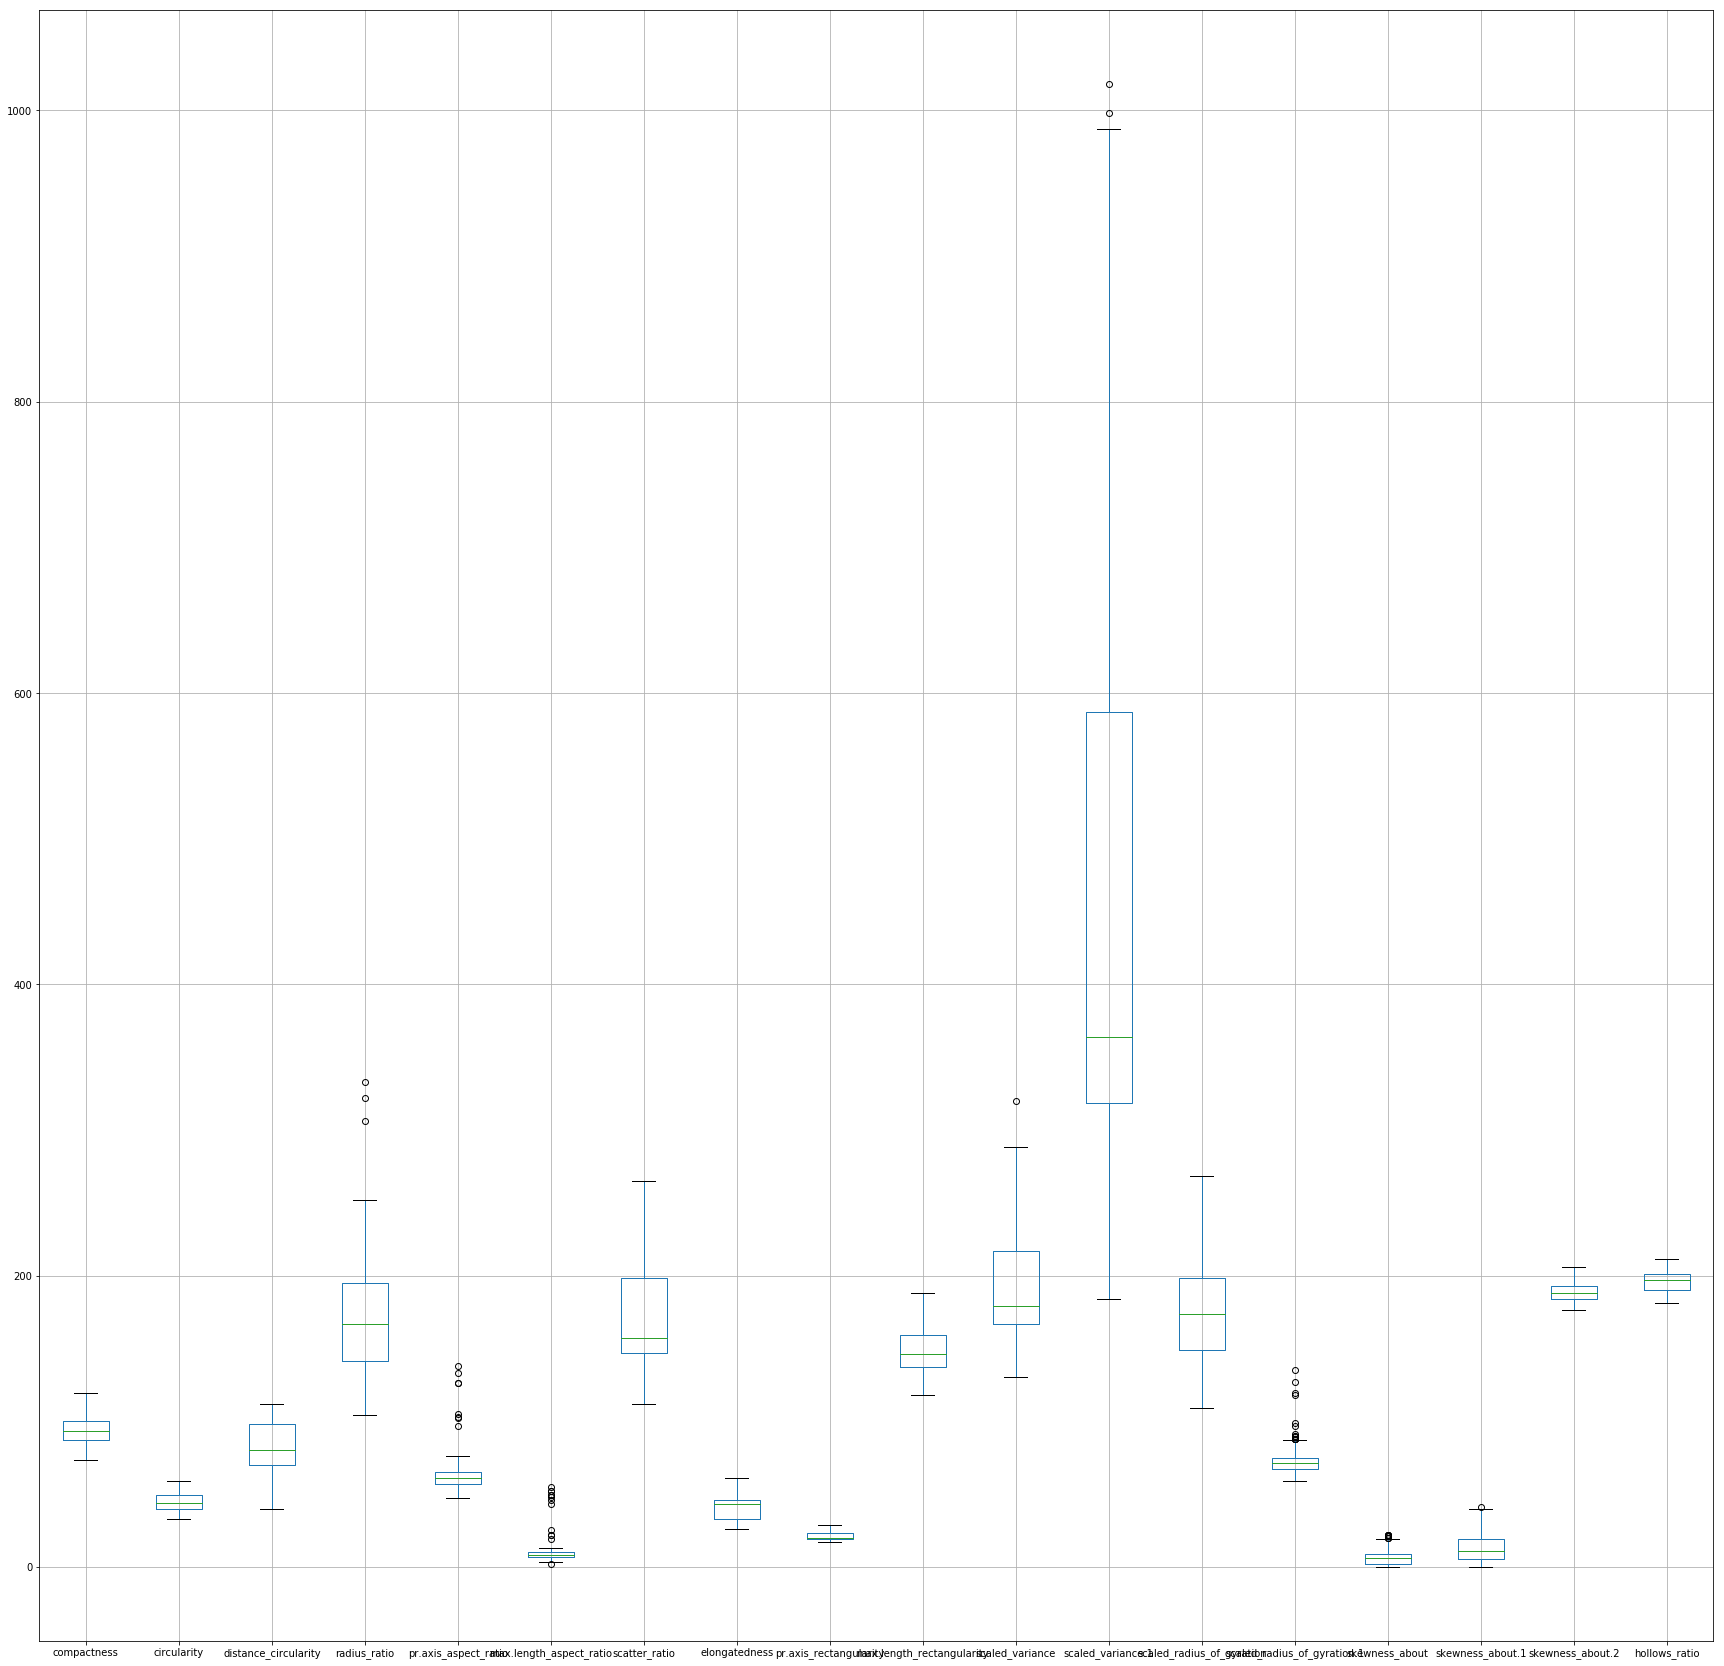

In [64]:
fig, ax = plt.subplots(figsize=(30,  30))
plt.xticks(rotation=180)

carDF.boxplot(ax=ax)

# There outliers in raduis_Ratio, P.aspect, length_aspect,scaled_variance, scaled_radius_of_gyration, Skewness_about

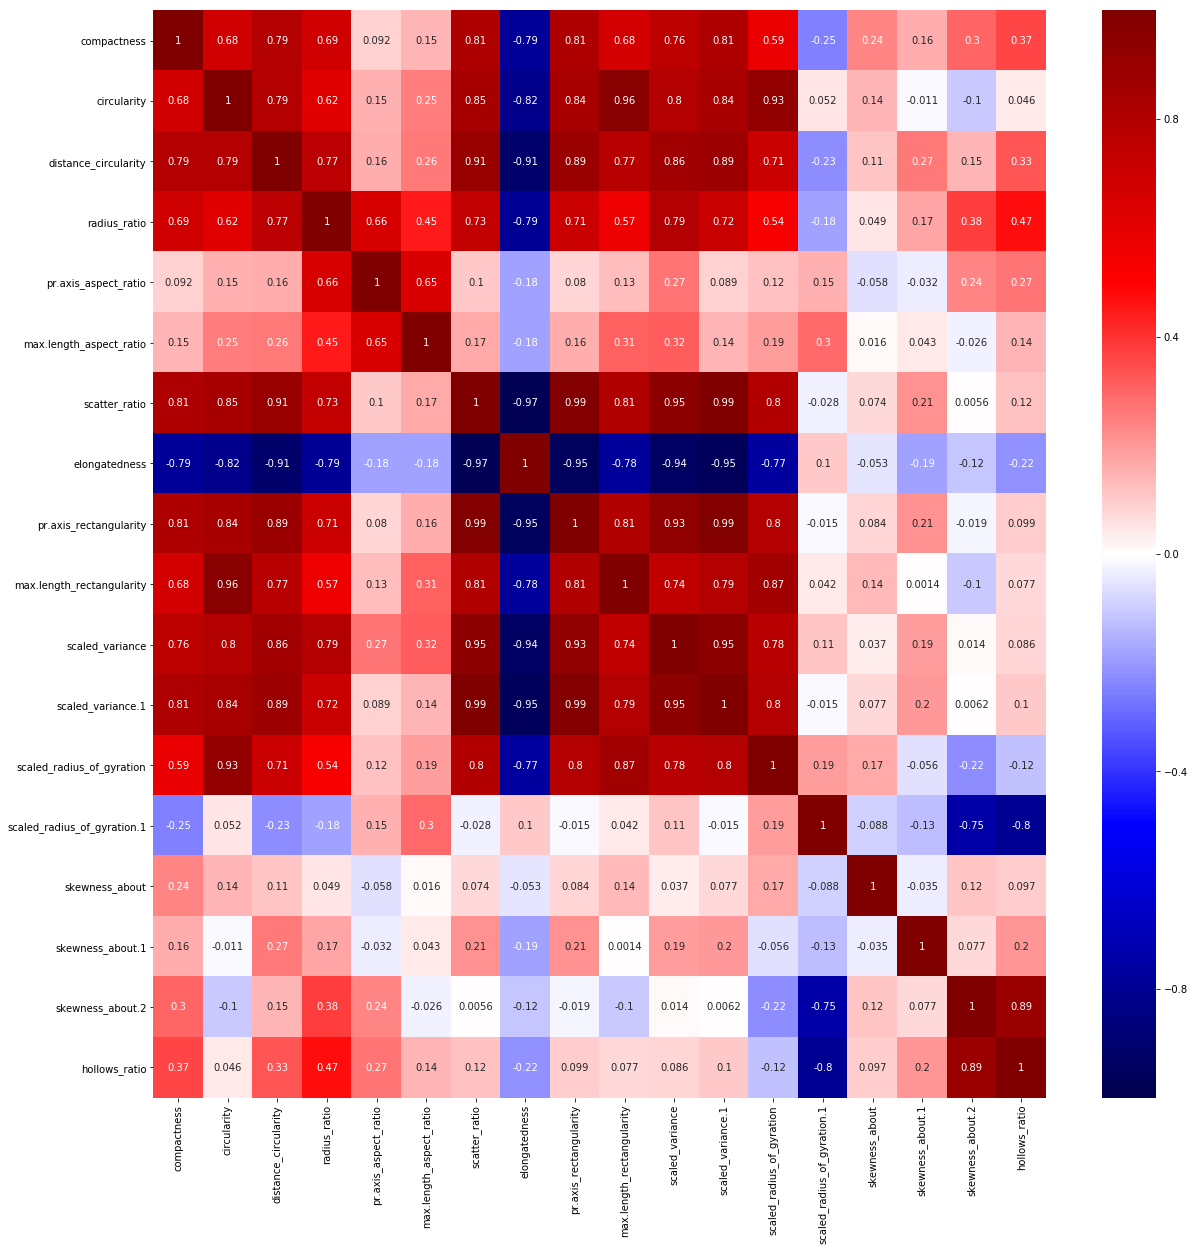

In [65]:
fig, ax = plt.subplots(figsize=(20,  20))
sns.heatmap(carDF.corr(),cmap='seismic', annot=True,vmax=1,vmin=-1)

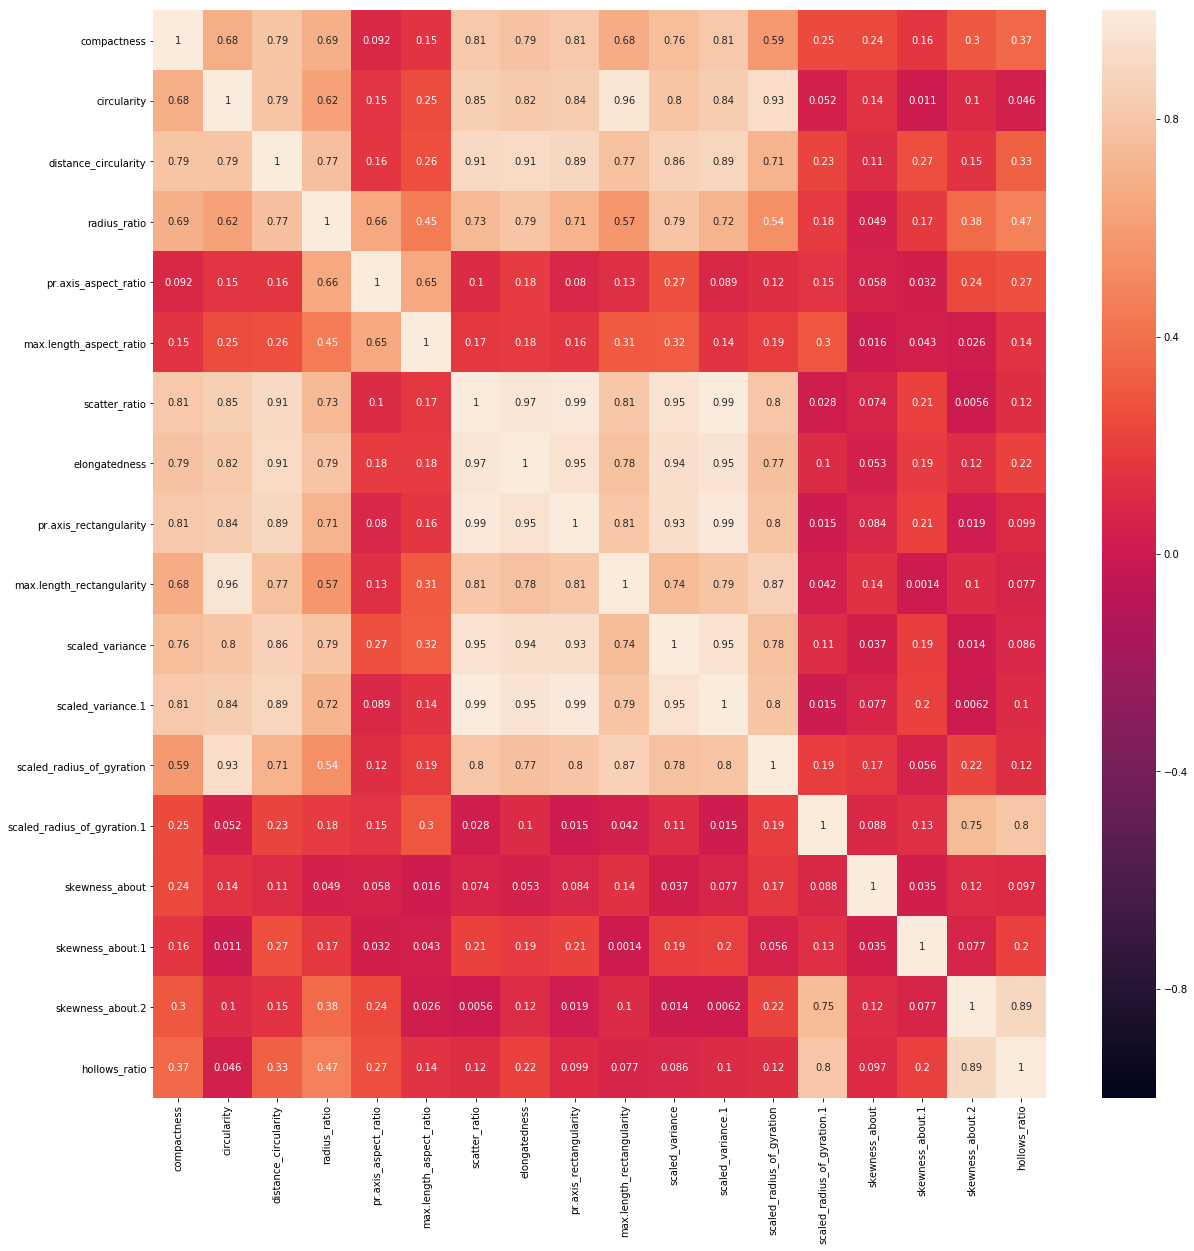

In [66]:
fig, ax = plt.subplots(figsize=(20,  20))
sns.heatmap(abs(carDF.corr()),annot=True,vmax=1,vmin=-1)

Observations:-  compactness, circlarity, distance circlarity, radius ratio,
,scatter_Ration,elongatedness, pr.axis_rectangularity, scaled_variance, radious of gyration therer seems to be
a high corelation postive or negative hence we will select these columsn for futher analysis



In [92]:
vclass=carDF.drop(['class','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1','hollows_ratio',
                   'skewness_about.2','skewness_about.1','skewness_about'],axis=1)

In [93]:
vclass

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration
0,95,48.0,83.0,178.0,162.0,42.0,20.0,159,176.0,379.0,184.0
1,91,41.0,84.0,141.0,149.0,45.0,19.0,143,170.0,330.0,158.0
2,104,50.0,106.0,209.0,207.0,32.0,23.0,158,223.0,635.0,220.0
3,93,41.0,82.0,159.0,144.0,46.0,19.0,143,160.0,309.0,127.0
4,85,44.0,70.0,205.0,149.0,45.0,19.0,144,241.0,325.0,188.0
5,107,44.0,106.0,172.0,255.0,26.0,28.0,169,280.0,957.0,264.0
6,97,43.0,73.0,173.0,153.0,42.0,19.0,143,176.0,361.0,172.0
7,90,43.0,66.0,157.0,137.0,48.0,18.0,146,162.0,281.0,164.0
8,86,34.0,62.0,140.0,122.0,54.0,17.0,127,141.0,223.0,112.0
9,93,44.0,98.0,167.0,183.0,36.0,22.0,146,202.0,505.0,152.0


In [94]:
pcamodel = PCA()
pcamodel.fit(vclass)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [95]:
var = pcamodel.explained_variance_ratio_

var.round(decimals=3)

array([0.967, 0.016, 0.011, 0.002, 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   ])

In [96]:
import numpy as np

In [99]:
a=np.arange(1,12,1)

In [100]:
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11]


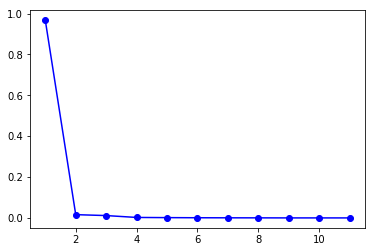

In [101]:
plt.plot(a, var,'-bo' )

Majority of the variance is explained by the first column, so we will select the first column 

In [106]:
vDFNw=pcamodel.transform(vclass)

In [107]:
vehDFfromTran = pd.DataFrame(vDFNw)

In [108]:
firstcolumnfromDF=vehDFfromTran.iloc[:,:1]

In [109]:
firstcolumnfromDF

,0
0,-56.881521
1,-116.340239
2,212.094095
3,-140.773823
4,-98.226317
5,536.210108
6,-79.653119
7,-164.380365
8,-236.859266
9,64.512472


In [103]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [110]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(firstcolumnfromDF)
    distortions.append(
    sum(np.min(cdist(firstcolumnfromDF, kmeanModel.cluster_centers_, 'euclidean'), axis=1))**2 / firstcolumnfromDF.shape[0])

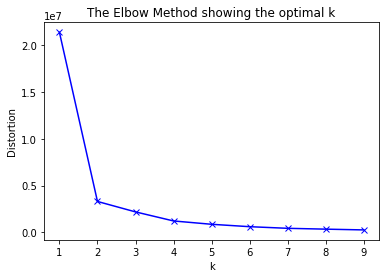

In [111]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We will select 3 clusters as stated in the problem statement

In [112]:

kmeans = KMeans(n_clusters=3)

In [113]:
kmeans.fit(firstcolumnfromDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
clusters=kmeans.labels_

In [115]:
carDF['labels']=clusters

In [116]:
carDF

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,labels
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,0
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus,1
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus,0
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van,0
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van,0
9,93,44.0,98.0,167.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car,2


In [117]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [118]:
sil_score = silhouette_score(firstcolumnfromDF,clusters)

In [119]:
sil_score

0.6147418099884684

# classification is achieved #sil score for the dataset is achieved 